In [1]:
# %matplotlib widget
import sys, os, importlib
package_path = os.path.abspath('..')    
if package_path not in sys.path:
    sys.path.append(package_path)
from package import functions as fn
from package import model as rm
from package import optimizer as opt
from package import plots
import numpy as np
from obspy.taup import TauPyModel
np.set_printoptions(precision=4, suppress=True)

In [2]:
seed = np.random.randint(0, 2025)
# seed = 25
np.random.seed(seed)
print(f'Seed: {seed}')
# np.random.seed(1513)
# np.random.seed(555)

# # BUG plot_iterates_2D (off by 1)
# np.random.seed(560)

# create random array for t, normalised to 1
t = fn.unit_vec(np.random.rand(3))

# create random array for p, normalised to 1
direc = fn.unit_vec(np.random.rand(3))
p = fn.starting_direc(t, direc)



t = np.array([ 0.11727534, -0.38461938,  0.91559512])
t = fn.unit_vec(t)
p = np.array([-0.31832113,  0.85875371,  0.4015143 ])
p = fn.unit_vec(p)



# ### NOTE FOR COMPARISON ###
t, p = fn.i_hat, fn.k_hat
# t, p = fn.unit_vec(fn.i_hat + fn.j_hat), fn.unit_vec(fn.j_hat - fn.i_hat)
# t, p = fn.i_hat, fn.j_hat

Seed: 528


Original params:  [  0.  45. -90.]


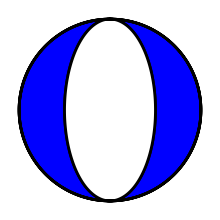

Takeoff angles: [45.74277419944782, 49.94361025435123]


In [3]:
#################################################################
# USE OBSPY TO PRODUCE BEACHBALLS FROM DIFFERENT INPUT PARAMETERS
# VERIFY CONSISTENCY FOR OUR vs OBSPY FUNCTIONS
#################################################################


# get true params for synthetic test
sdr = fn.tp2sdr(t, p, True)[0]
print('Original params: ', sdr)

# plot corresponding beachball
beachball = fn.beachball(sdr)


# set up parameters for inversion
model = TauPyModel(model='ak135')  # velocity model
# model = TauPyModel(model='iasp...')
hdepth = 15  # km - assumed quake depth
epdist = 10  # degrees - epicentral distance
azimuth = 200  # degrees - azimuth of seismometer
p_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['P'])
s_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['S'])
takeoff_angles = [p_arrivals[0].takeoff_angle, s_arrivals[0].takeoff_angle]
print(f"Takeoff angles: {takeoff_angles}")


hidden = fn.tp2hidden(t, p, azimuth, in_deg=True)


#############################################
# EXTRACT VELOCITIES FROM LOOKUP TABLE
#############################################
# look for them in TauPy, may not work
# use linear interpolation from Suzan's table
#############################################
velocities = np.array([5.8000, 3.4600])

In [5]:
importlib.reload(fn)
tensor = fn.hidden2mt(hidden, azimuth, in_deg=True)
tensor = fn.enu2use(tensor)
compressed_tensor = np.array([
                tensor[0,0], tensor[1,1], tensor[2,2],
                tensor[0,1], tensor[0,2], tensor[1,2],
            ])
tensor

array([[-1.,  0.,  0.],
       [ 0.,  0., -0.],
       [ 0., -0.,  1.]])

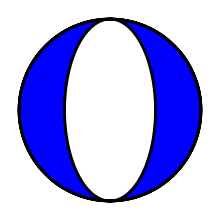

In [6]:
fn.beachball(compressed_tensor);